In [1]:
#!pip install citipy

In [2]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time
from scipy import stats
from scipy.stats import linregress
# Import api key
from config import api_key
# Import citipy for city names by long. and lat.
from citipy import citipy

In [3]:
# Define ranges for longitude and latitude
latitude_range = (-90,90)
longitude_range = (-180,180)

In [4]:
# Create lists for coordinates and cities
lat_long_coord = []
cities = []

# Create random latitude and longitude combinations - 1500 at the end
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
lat_long_coord = zip(latitude, longitude)

# Build a for loop to find city names for random coordinates
for lat_long in lat_long_coord:
    city = citipy.nearest_city(lat_long[0], lat_long[1])
    city = city.city_name
    
    # Add the city to a list if it is unique
    if city not in cities:
        cities.append(city)

In [5]:
# Check length of the list
len(cities)
#print(cities)

613

In [6]:
# Create base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}"
# define units
units = "imperial"

# Build query url with units
query_url = f"{base_url}&units={units}&q="

In [7]:
# Create lists for results
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
cities_reduced = []
latitude_reduced = []
longitude_reduced = []

In [8]:
# Loop through cities to find results
index = 0

for city in cities:
    
    # Create url for city
    full_url = f"{query_url}{city}"
    index += 1
    
    try:
    # Find json response for city
        response = requests.get(full_url).json()
        city_number = response["id"]
        
        # Find data to append for each city
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        weather_date = response["dt"]
        
        
         # Print text about: Append results
        print(f"City {index} of {len(cities)}: {city} found. City Number: {city_number}. Appending results.")
        
        # Append all results
        cities_reduced.append(city)
        latitude_reduced.append(lat)
        longitude_reduced.append(long)
        temperature.append(temp_max)
        humidity.append(humid)
        cloudiness.append(clouds)
        wind_speed.append(wind)
        countries.append(country)
        dates.append(weather_date)
        
        
    except KeyError:
        print(f"{city} not found.")
        

City 1 of 613: chokurdakh found. City Number: 2126123. Appending results.
City 2 of 613: victoria found. City Number: 1819729. Appending results.
City 3 of 613: butaritari found. City Number: 2110227. Appending results.
City 4 of 613: atuona found. City Number: 4020109. Appending results.
City 5 of 613: puerto rondon found. City Number: 3671337. Appending results.
City 6 of 613: punta arenas found. City Number: 3874787. Appending results.
City 7 of 613: albany found. City Number: 5106841. Appending results.
City 8 of 613: esperance found. City Number: 2071860. Appending results.
tsihombe not found.
City 10 of 613: port elizabeth found. City Number: 964420. Appending results.
City 11 of 613: kurikka found. City Number: 650095. Appending results.
illoqqortoormiut not found.
City 13 of 613: isangel found. City Number: 2136825. Appending results.
City 14 of 613: hailar found. City Number: 2037078. Appending results.
City 15 of 613: yerbogachen found. City Number: 2012956. Appending results

vaitupu not found.
City 122 of 613: nishihara found. City Number: 1855342. Appending results.
City 123 of 613: muros found. City Number: 3115824. Appending results.
City 124 of 613: khatanga found. City Number: 2022572. Appending results.
belushya guba not found.
City 126 of 613: nikolskoye found. City Number: 546105. Appending results.
City 127 of 613: trairi found. City Number: 3386177. Appending results.
City 128 of 613: general roca found. City Number: 3855065. Appending results.
palabuhanratu not found.
City 130 of 613: saint-augustin found. City Number: 6137462. Appending results.
City 131 of 613: vardo found. City Number: 777019. Appending results.
City 132 of 613: tiksi found. City Number: 2015306. Appending results.
City 133 of 613: flin flon found. City Number: 5954718. Appending results.
City 134 of 613: longyearbyen found. City Number: 2729907. Appending results.
City 135 of 613: torbay found. City Number: 6167817. Appending results.
City 136 of 613: madang found. City Numb

City 240 of 613: dehloran found. City Number: 136702. Appending results.
City 241 of 613: mitu found. City Number: 3674676. Appending results.
City 242 of 613: port blair found. City Number: 1259385. Appending results.
City 243 of 613: mariental found. City Number: 3355595. Appending results.
City 244 of 613: ola found. City Number: 2122574. Appending results.
City 245 of 613: san isidro found. City Number: 3929631. Appending results.
City 246 of 613: tigzirt found. City Number: 2476660. Appending results.
City 247 of 613: coahuayana found. City Number: 4013679. Appending results.
City 248 of 613: sao joao da barra found. City Number: 3448903. Appending results.
City 249 of 613: mandal found. City Number: 1263917. Appending results.
City 250 of 613: porto belo found. City Number: 3452900. Appending results.
City 251 of 613: bila krynytsya found. City Number: 712656. Appending results.
City 252 of 613: tuatapere found. City Number: 2180815. Appending results.
City 253 of 613: oulainen f

City 355 of 613: bagdarin found. City Number: 2027244. Appending results.
City 356 of 613: chicama found. City Number: 3698359. Appending results.
City 357 of 613: klyuchi found. City Number: 1503153. Appending results.
City 358 of 613: sayyan found. City Number: 70979. Appending results.
City 359 of 613: alindao found. City Number: 240999. Appending results.
sedelnikovo not found.
City 361 of 613: blackwater found. City Number: 2175403. Appending results.
City 362 of 613: hami found. City Number: 1529484. Appending results.
City 363 of 613: vrdy found. City Number: 3062419. Appending results.
City 364 of 613: bonavista found. City Number: 5905393. Appending results.
City 365 of 613: samarai found. City Number: 2132606. Appending results.
tumannyy not found.
City 367 of 613: oarai found. City Number: 2111567. Appending results.
City 368 of 613: celano found. City Number: 3179216. Appending results.
City 369 of 613: pangnirtung found. City Number: 6096551. Appending results.
City 370 of

City 471 of 613: batagay-alyta found. City Number: 2027042. Appending results.
City 472 of 613: mindelo found. City Number: 3374462. Appending results.
City 473 of 613: port-cartier found. City Number: 6111696. Appending results.
City 474 of 613: kota bahru found. City Number: 1736376. Appending results.
City 475 of 613: sao jose da coroa grande found. City Number: 3388456. Appending results.
City 476 of 613: tenenkou found. City Number: 2449938. Appending results.
City 477 of 613: salgado de sao felix found. City Number: 3389873. Appending results.
City 478 of 613: bud found. City Number: 4255151. Appending results.
City 479 of 613: zambezi found. City Number: 895953. Appending results.
City 480 of 613: bonnyville found. City Number: 5905616. Appending results.
City 481 of 613: qitaihe found. City Number: 2035261. Appending results.
City 482 of 613: gushikawa found. City Number: 1863495. Appending results.
City 483 of 613: caborca found. City Number: 3996893. Appending results.
City 4

City 586 of 613: gambela found. City Number: 337405. Appending results.
City 587 of 613: bowen found. City Number: 2174444. Appending results.
City 588 of 613: bac lieu found. City Number: 1591474. Appending results.
City 589 of 613: puerto colombia found. City Number: 3671497. Appending results.
City 590 of 613: amarante do maranhao found. City Number: 3407755. Appending results.
City 591 of 613: shimoda found. City Number: 1852357. Appending results.
City 592 of 613: kuito found. City Number: 3348078. Appending results.
City 593 of 613: finschhafen found. City Number: 2097418. Appending results.
City 594 of 613: wanxian found. City Number: 1791748. Appending results.
City 595 of 613: delijan found. City Number: 136399. Appending results.
artyk not found.
City 597 of 613: vegreville found. City Number: 6173635. Appending results.
City 598 of 613: virden found. City Number: 4252060. Appending results.
City 599 of 613: izmit found. City Number: 745028. Appending results.
City 600 of 613

In [9]:
# Create DataFrame from series
weather_data = pd.DataFrame({
    "City": cities_reduced,
    "Latitude": latitude_reduced,
    "Longitude": longitude_reduced,
    "Max Temp.": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})
#weather_data = pd.DataFrame(weather_data)


In [85]:
# Convert Unix timestamp to readable date using datetime module
from datetime import datetime

weather_data["Date Converted"] = pd.to_datetime(weather_data["Date"], unit='s')

dates_converted = weather_data["Date Converted"]

In [86]:
weather_data

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date,Date Converted
0,chokurdakh,70.6333,147.9167,15.76,85,100,11.59,RU,1618867809,2021-04-19 21:30:09
1,victoria,22.2855,114.1577,72.00,78,97,20.71,HK,1618867696,2021-04-19 21:28:16
2,butaritari,3.0707,172.7902,83.12,76,95,13.31,KI,1618867809,2021-04-19 21:30:09
3,atuona,-9.8000,-139.0333,80.20,78,21,18.63,PF,1618867810,2021-04-19 21:30:10
4,puerto rondon,6.2805,-71.1000,87.35,47,100,7.58,CO,1618867810,2021-04-19 21:30:10
...,...,...,...,...,...,...,...,...,...,...
564,taoudenni,22.6783,-3.9836,83.59,11,0,10.42,ML,1618868052,2021-04-19 21:34:12
565,neyshabur,36.2133,58.7958,60.73,42,3,1.21,IR,1618868052,2021-04-19 21:34:12
566,itamaraju,-17.0392,-39.5311,73.42,94,86,4.94,BR,1618868053,2021-04-19 21:34:13
567,ciamis,-7.3257,108.3534,72.34,94,92,1.01,ID,1618868053,2021-04-19 21:34:13


In [87]:
# Output dataframe to csv
weather_data.to_csv("./OutputData/cities_weather_data.csv", encoding="utf-8", index=False)

In [88]:
# Bring dataframe back in
weather_data_df = pd.read_csv("./OutputData/cities_weather_data.csv")

# Remove Unix Timestamp
weather_data_df = weather_data_df[["City", "Latitude", "Longitude", "Max Temp.", "Humidity", "Cloudiness",
                                  "Wind Speed", "Country", "Date Converted"]]
# Rename column
weather_data_df = weather_data_df.rename(columns = {"Date Converted": "Date"})

weather_data_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,15.76,85,100,11.59,RU,2021-04-19 21:30:09
1,victoria,22.2855,114.1577,72.00,78,97,20.71,HK,2021-04-19 21:28:16
2,butaritari,3.0707,172.7902,83.12,76,95,13.31,KI,2021-04-19 21:30:09
3,atuona,-9.8000,-139.0333,80.20,78,21,18.63,PF,2021-04-19 21:30:10
4,puerto rondon,6.2805,-71.1000,87.35,47,100,7.58,CO,2021-04-19 21:30:10
...,...,...,...,...,...,...,...,...,...
564,taoudenni,22.6783,-3.9836,83.59,11,0,10.42,ML,2021-04-19 21:34:12
565,neyshabur,36.2133,58.7958,60.73,42,3,1.21,IR,2021-04-19 21:34:12
566,itamaraju,-17.0392,-39.5311,73.42,94,86,4.94,BR,2021-04-19 21:34:13
567,ciamis,-7.3257,108.3534,72.34,94,92,1.01,ID,2021-04-19 21:34:13


In [89]:
weather_data_df["Humidity"].describe()

count    569.000000
mean      68.179262
std       22.744900
min        6.000000
25%       54.000000
50%       74.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

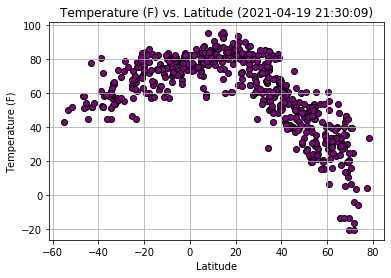

In [95]:
# Create Scatter Plot for Temp vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temp."], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature (F) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/temp_lat.png")
plt.show()

Add what the code is analyzing.

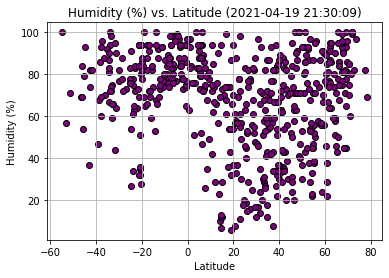

In [98]:
# Create Scatter Plot for Humidity vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity (%) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/humidity_lat.png")
plt.show()

Add what the code is analyzing.

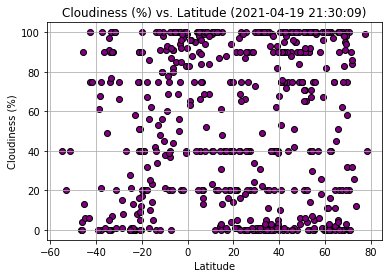

In [101]:
# Create Scatter Plot for Cloudiness vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness (%) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/cloudiness_lat.png")
plt.show()

Add what the code is analyzing.

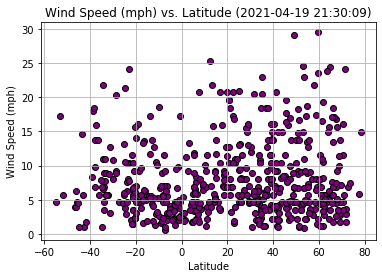

In [102]:
# Create Scatter Plot for Wind Speed vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed (mph) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/windspeed_lat.png")
plt.show()

Add what the code is analyzing.

In [22]:
# Create separate northern hemisphere dataframe
northern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] >= 0, :]
northern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,15.76,85,100,11.59,RU,2021-04-19 21:30:09
1,victoria,22.2855,114.1577,72.00,78,97,20.71,HK,2021-04-19 21:28:16
2,butaritari,3.0707,172.7902,83.12,76,95,13.31,KI,2021-04-19 21:30:09
4,puerto rondon,6.2805,-71.1000,87.35,47,100,7.58,CO,2021-04-19 21:30:10
6,albany,42.6001,-73.9662,60.01,43,100,4.21,US,2021-04-19 21:26:10
...,...,...,...,...,...,...,...,...,...
560,narsaq,60.9167,-46.0500,41.00,38,100,6.91,GL,2021-04-19 21:34:10
561,pasni,25.2631,63.4710,80.17,46,18,12.95,PK,2021-04-19 21:34:11
564,taoudenni,22.6783,-3.9836,83.59,11,0,10.42,ML,2021-04-19 21:34:12
565,neyshabur,36.2133,58.7958,60.73,42,3,1.21,IR,2021-04-19 21:34:12


In [23]:
# Create separate southern hemisphere dataframe
southern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] < 0, :]
southern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
3,atuona,-9.8000,-139.0333,80.20,78,21,18.63,PF,2021-04-19 21:30:10
5,punta arenas,-53.1500,-70.9167,50.00,57,20,17.27,CL,2021-04-19 21:30:11
7,esperance,-33.8667,121.9000,57.20,100,75,6.91,AU,2021-04-19 21:28:14
8,port elizabeth,-33.9180,25.5701,59.00,94,90,3.44,ZA,2021-04-19 21:30:12
10,isangel,-19.5500,169.2667,84.20,84,20,5.75,VU,2021-04-19 21:30:13
...,...,...,...,...,...,...,...,...,...
552,finschhafen,-6.6024,147.8681,82.04,76,80,6.22,PG,2021-04-19 21:34:07
562,mount gambier,-37.8333,140.7667,51.80,93,75,6.91,AU,2021-04-19 21:34:11
563,siavonga,-16.5382,28.7088,67.24,72,25,6.46,ZM,2021-04-19 21:34:11
566,itamaraju,-17.0392,-39.5311,73.42,94,86,4.94,BR,2021-04-19 21:34:13


# Linear Regression:

# Temperature vs. Latitude

## Northern Hemisphere:

In [103]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Max Temp."])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      23.613760
1      72.528638
2      91.968812
4      88.721363
6      51.975766
         ...    
560    33.444327
561    69.516114
564    72.131231
565    58.437477
568    44.708212
Name: Latitude, Length: 399, dtype: float64
y = -1.01x + 95.08


The r-value is: 0.726171997164924


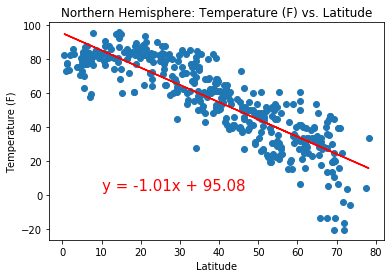

In [104]:
# Create Plot: Temp vs Lat (Northern)
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Max Temp."], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere: Temperature (F) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (10,3), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [105]:
# Perform a linear regression on temperature vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Max Temp."])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

3      74.597574
5      51.515746
7      61.783193
8      61.755878
10     69.406160
         ...    
552    76.300145
562    59.671165
563    71.009801
566    70.743042
567    75.915022
Name: Latitude, Length: 170, dtype: float64
y = 0.53x + 79.82


The r-value is: 0.4474806543329188


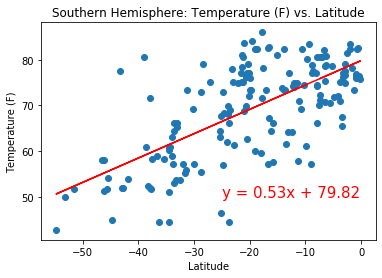

In [106]:
# Create Plot: Temp vs Lat (Southern)
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Max Temp."], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere: Temperature (F) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,50), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_south.png")

# Show plot
plt.show()

### Analysis for Temperature vs. Latitude:

There is a greater correlation between *temperature* and *latitude* in the **Northern Hemisphere** cities than the Southern Hemisphere cities, as the r-value is ***0.73*** for the Northern Hemisphere and 0.45 for the Southern Hemisphere.


# Humidity vs. Latitude

## Northern Hemisphere:

In [107]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Humidity"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      68.641600
1      61.379036
2      58.492685
4      58.974845
6      64.430593
         ...    
560    67.182021
561    61.826316
564    61.438040
565    63.471200
568    65.509632
Name: Latitude, Length: 399, dtype: float64
y = 0.15x + 58.03


The r-value is: 0.015957890248107565


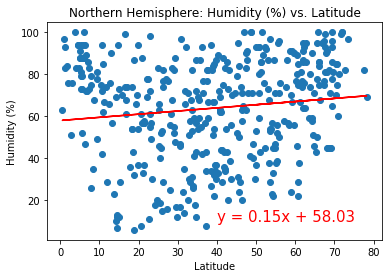

In [108]:
# Create Plot: Temp vs Lat (Northern)
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Humidity"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [109]:
# Perform a linear regression on humidity vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Humidity"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)


3      81.143727
5      69.070629
7      74.441083
8      74.426796
10     78.428325
         ...    
552    82.034268
562    73.336374
563    79.267119
566    79.127590
567    81.832827
Name: Latitude, Length: 170, dtype: float64
y = 0.28x + 83.87


The r-value is: 0.05548401829000132


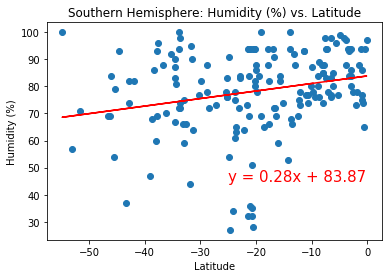

In [110]:
# Create Plot: Humidity vs Lat (Southern)
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Humidity"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,45), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_south.png")

# Show plot
plt.show()

### Analysis for Humidity vs. Latitude:

For both hemispheres, there is hardly any correlation between *humidity* and *latitude*, since both r-values are close to 0.


# Cloudiness vs. Latitude

## Northern Hemisphere:

In [111]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      51.959551
1      52.379442
2      52.546319
4      52.518442
6      52.203014
         ...    
560    52.043938
561    52.353582
564    52.376031
565    52.258482
568    52.140629
Name: Latitude, Length: 399, dtype: float64
y = -0.01x + 52.57


The r-value is: 1.8872844832341473e-05


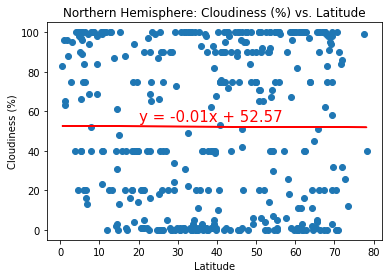

In [112]:
# Create Plot: Temp vs Lat (Northern)
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (20,55), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [113]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

3      58.854951
5      18.738751
7      36.583566
8      36.536093
10     49.832276
         ...    
552    61.814018
562    32.912864
563    52.619404
566    52.155777
567    61.144674
Name: Latitude, Length: 170, dtype: float64
y = 0.93x + 67.92


The r-value is: 0.10727509653288135


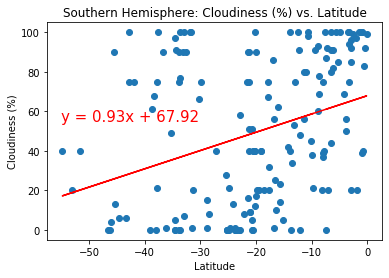

In [114]:
# Create Plot: Temp vs Lat (southern)
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-55,55), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_south.png")

# Show plot
plt.show()

### Analysis for Cloudiness vs. Latitude:

For both hemispheres, there is close to no correlation between *cloudiness* and *latitude*. The Northern Hemisphere r-value of 0.0 suggests that there is no correlation between these two factors in that hemisphere. The r-value of the Southern Hemisphere is 0.11, which is a little higher than 0.0, so there may be a little more correlation between these two factors in this hemisphere, but not enough to be significant. 


# Wind Speed vs. Latitude

## Northern Hemisphere:

In [119]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      8.692706
1      8.003049
2      7.728960
4      7.774746
6      8.292826
         ...   
560    8.554103
561    8.045523
564    8.008652
565    8.201722
568    8.395293
Name: Latitude, Length: 399, dtype: float64
y = 0.01x + 7.69


The r-value is: 0.0025918728280524507


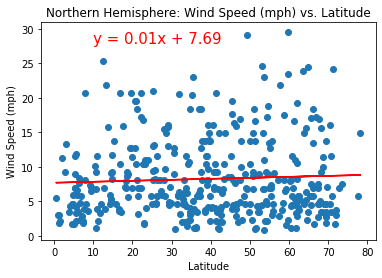

In [120]:
# Create Plot: wind speed vs Lat (Northern)
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (10,28), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [121]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

3      5.937710
5      9.806607
7      8.085613
8      8.090192
10     6.807878
         ...   
552    5.652331
562    8.439624
563    6.539081
566    6.583794
567    5.716884
Name: Latitude, Length: 170, dtype: float64
y = -0.09x + 5.06


The r-value is: 0.06164249146694927


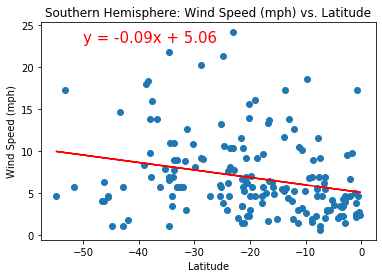

In [122]:
# Create Plot: wind speed vs Lat (southern)
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-50,23), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_south.png")

# Show plot
plt.show()

### Analysis for Wind Speed vs. Latitude:

For both hemispheres, there is also close to no correlation between *wind speed* and *latitude*. Again, the Northern Hemisphere r-value of 0.0 suggests that there is no correlation in this hemisphere. The Southern Hemisphere has an r-value of 0.06, which is still pretty low, but a little higher than 0.0.
